In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import glob
from scipy.optimize import curve_fit

In [4]:
figsize(10, 8)

In [5]:
banks = ['A', 'B', 'C']

In [6]:
def line(x, m, b):
    return m * x + b

In [7]:
def naive_map(data,ra,dec):
    ra_bins = np.linspace(332.4, 339.0, 100)
    dec_bins = np.linspace(62, 64.8, 42)
    p,_,_ = np.histogram2d(ra, dec, bins=(ra_bins, dec_bins), weights=data)
    hits,_,_ = np.histogram2d(ra, dec, bins=(ra_bins, dec_bins))
    return p.T, hits.T, ra_bins, dec_bins

In [8]:
def get_map(bank='A', session='5', pixbeam=4., doplot=False):
    dataf = np.load('/home/mabitbol/GBT-S140/datamaps/datamaps_'+bank+'_'+session+'.npz')
    tmask = dataf['tmask']
    ras = dataf['ras'][tmask]
    decs = dataf['decs'][tmask]
    calibrated = dataf['calibrated'][tmask]
    
    tmask2 = ~np.isnan(calibrated)
    ras = ras[tmask2]
    decs = decs[tmask2]
    calibrated = calibrated[tmask2] 
    
    datamap, hits, rabins, decbins = naive_map(calibrated, ras, decs)
    mask = hits == 0
    signal = np.zeros_like(datamap)
    signal[~mask] = datamap[~mask] / hits[~mask]
    signal[mask] = np.nan
    
    if doplot:
        figure()
        pc = pcolormesh(rabins, decbins, signal)
        clim(-0.1, 0.1)
        cb = colorbar()
        xlabel('RA [degrees]')
        ylabel('DEC [degrees]')
        cb.set_label('Flux [Jy]')
    return signal, rabins, decbins

In [9]:
def compare_pixels(map1, map2):
    N = size(map1)
    sigA = map1.reshape(N, -1)
    sigB = map2.reshape(N, -1)
    maskA = ~np.isnan(sigA)
    maskB = ~np.isnan(sigB)
    mask = maskA * maskB
    popt = curve_fit(line, sigA[mask], sigB[mask])
    print popt[0]
    
    figure()
    plot(sigA, sigB, '.')
    plot(sigA, line(sigA, 1., 0), 'g')
    plot(sigA, line(sigA, *popt[0]), 'k')
    plot(popt[0][1],popt[0][1], 'rx', markersize=10)
    grid()

In [62]:
def difference_map(map1, map2, ms=False):
    maskA = ~np.isnan(map1)
    maskB = ~np.isnan(map2)
    mask = maskA * maskB
    diffAB = map1 - map2
    diffAB[~mask] = np.nan
    
    if ms:
        diffAB -= np.nanmean(diffAB)
    
    figure()
    pc = pcolormesh(rabins, decbins, diffAB)
    clim(-.05, .05)
    cb = colorbar()
    xlabel('RA [degrees]')
    ylabel('DEC [degrees]')

In [51]:
def perdifference_map(map1, map2):
    maskA = ~np.isnan(map1)
    maskB = ~np.isnan(map2)
    mask = maskA * maskB
    diffAB = np.abs(map1 - map2) 
    diffAB[mask] /= np.abs(map2[mask])
    diffAB[~mask] = np.nan
    figure()
    pc = pcolormesh(rabins, decbins, diffAB)
    clim(-1, 1.)
    cb = colorbar()
    xlabel('RA [degrees]')
    ylabel('DEC [degrees]')

In [10]:
maps2 = {}
for bank in banks:
    siga, rabins, decbins = get_map(bank, '2')
    maps2[bank] = siga

In [11]:
maps3 = {}
for bank in banks:
    siga, rabins, decbins = get_map(bank, '3')
    maps3[bank] = siga

In [12]:
maps5 = {}
for bank in banks:
    siga, rabins, decbins = get_map(bank, '5')
    maps5[bank] = siga

[ 0.93092769  0.00158652]


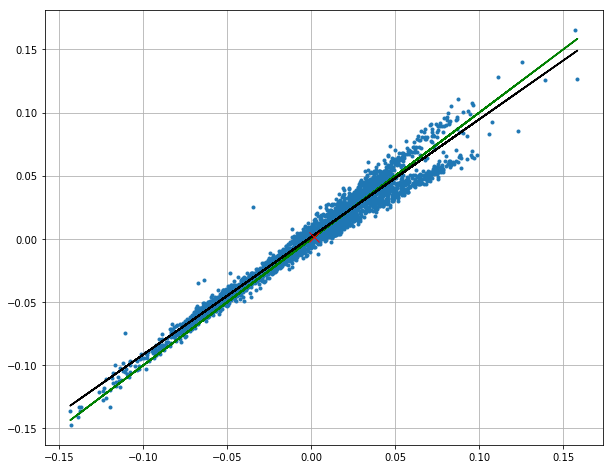

In [13]:
compare_pixels(maps5['A'], maps5['B'])

[ 0.93645463  0.00456207]


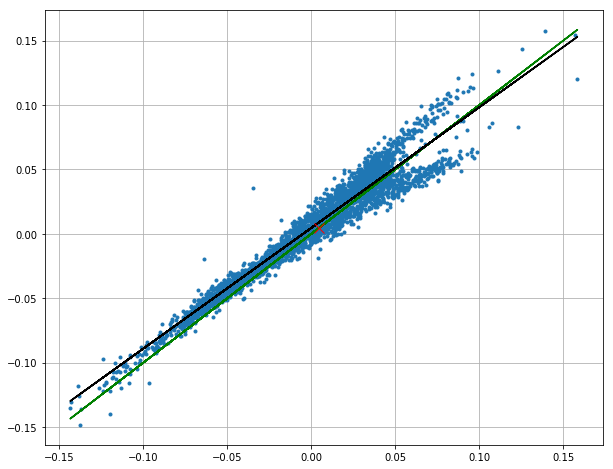

In [14]:
compare_pixels(maps5['A'], maps5['C'])

[ 1.01277006  0.00296196]


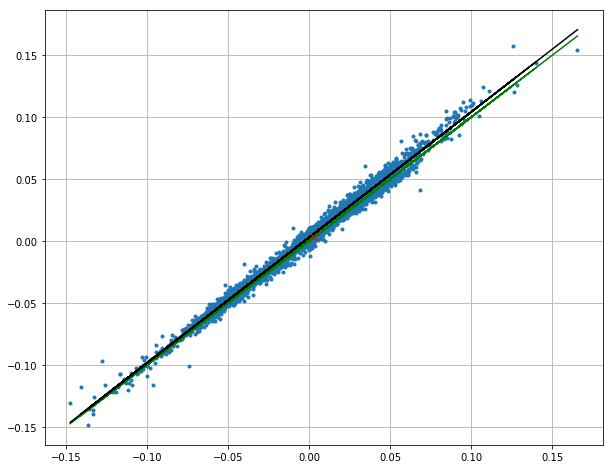

In [15]:
compare_pixels(maps5['B'], maps5['C'])

[ 0.89576664  0.00111128]


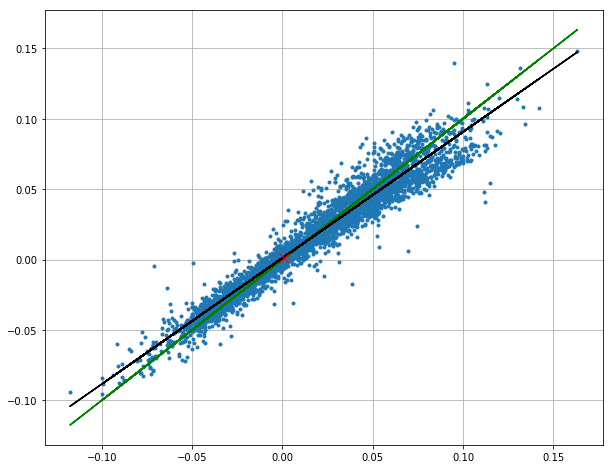

In [16]:
compare_pixels(maps2['A'], maps2['B'])

[ 0.89308832  0.00346375]


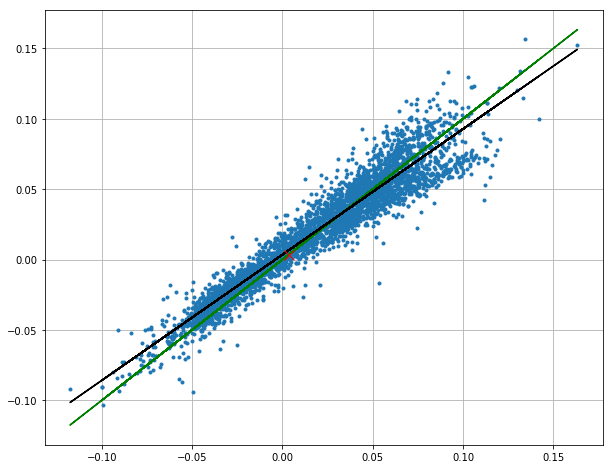

In [17]:
compare_pixels(maps2['A'], maps2['C'])

[ 0.99135944  0.00245209]


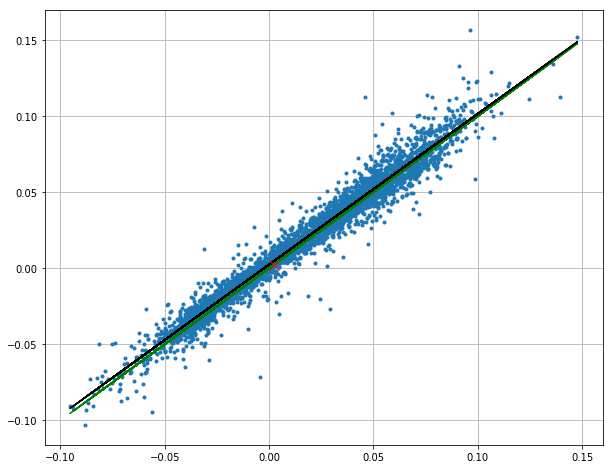

In [18]:
compare_pixels(maps2['B'], maps2['C'])

[ 0.65721528  0.00090498]


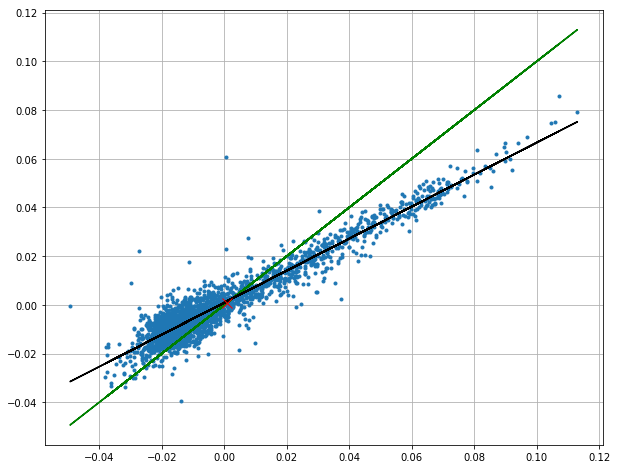

In [19]:
compare_pixels(maps3['A'], maps3['B'])

[ 0.56118643  0.00363372]


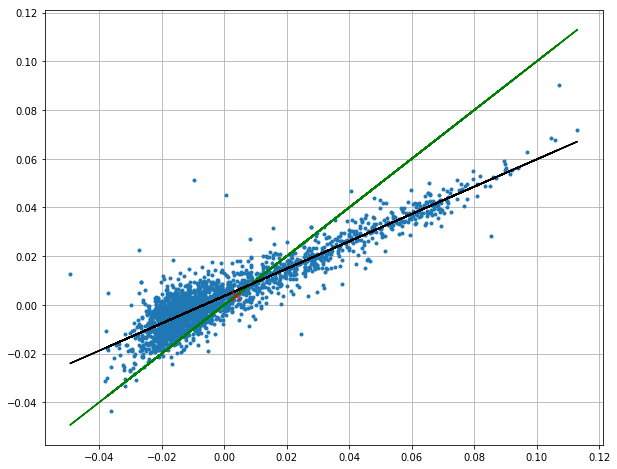

In [20]:
compare_pixels(maps3['A'], maps3['C'])

[ 0.84790532  0.00286399]


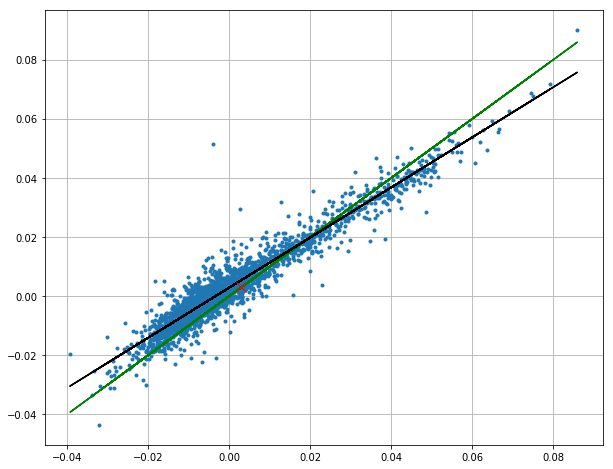

In [21]:
compare_pixels(maps3['B'], maps3['C'])

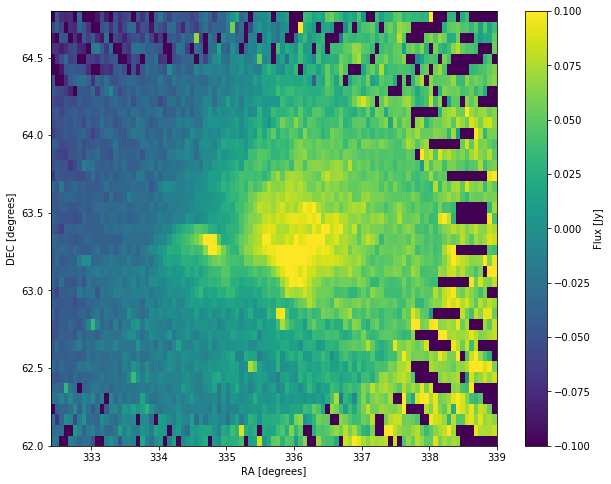

In [76]:
get_map('A', '2', doplot=True);

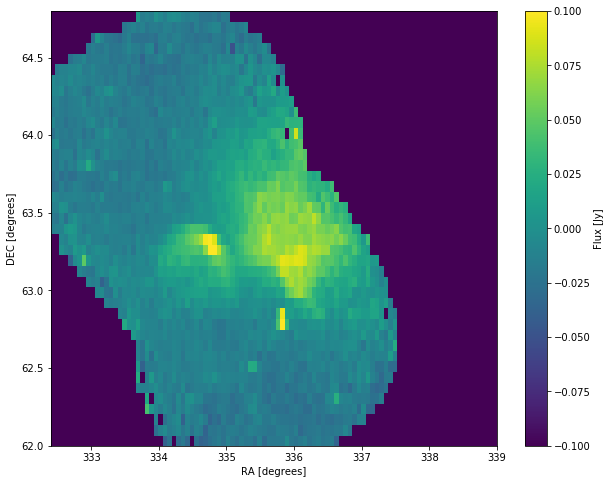

In [77]:
get_map('A', '3', doplot=True);

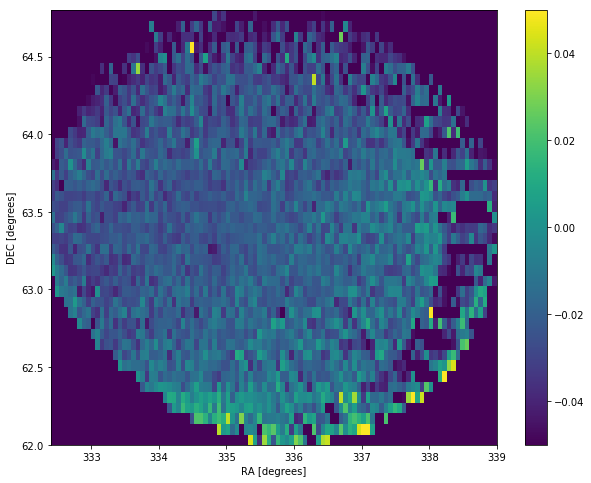

In [80]:
difference_map(maps5['A'], maps2['A'])

[ 0.45110048 -0.00212552]


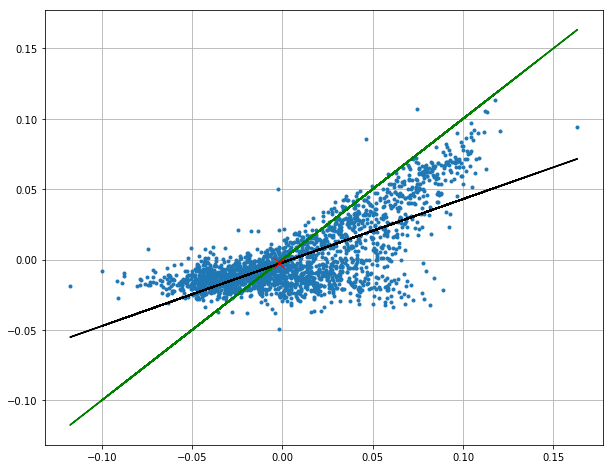

In [23]:
compare_pixels(maps2['A'], maps3['A'])

[ 1.00054906 -0.02158938]


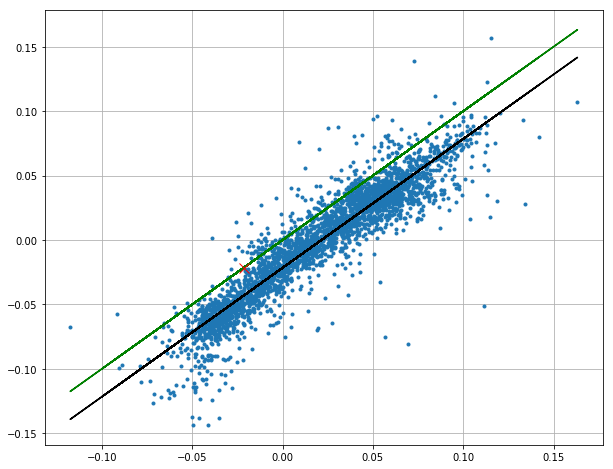

In [24]:
compare_pixels(maps2['A'], maps5['A'])

[ 1.19883137 -0.01480297]


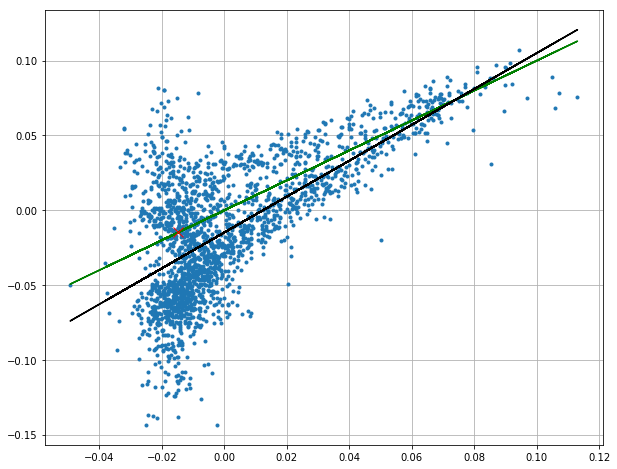

In [25]:
compare_pixels(maps3['A'], maps5['A'])

[  2.59403592e-01   7.13664416e-05]


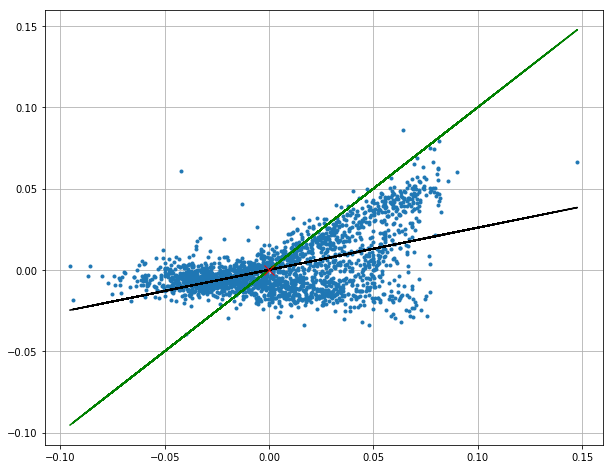

In [29]:
compare_pixels(maps2['B'], maps3['B'])

[ 1.04878224 -0.01956425]


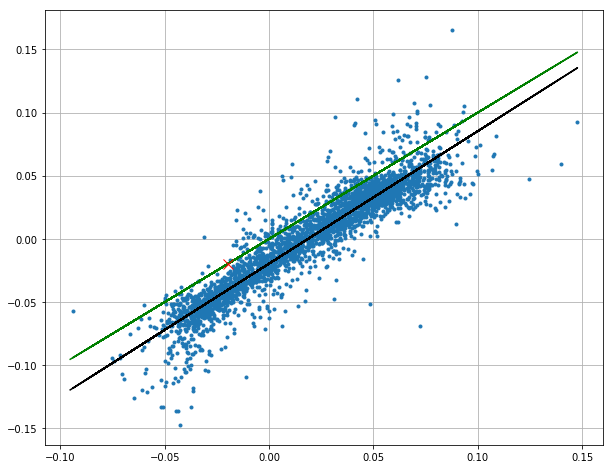

In [27]:
compare_pixels(maps2['B'], maps5['B'])

[ 1.01036708 -0.01387729]


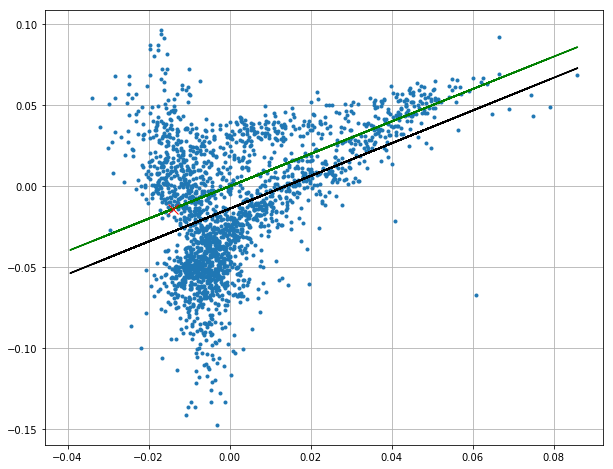

In [30]:
compare_pixels(maps3['B'], maps5['B'])

[ 0.17817209  0.0027892 ]


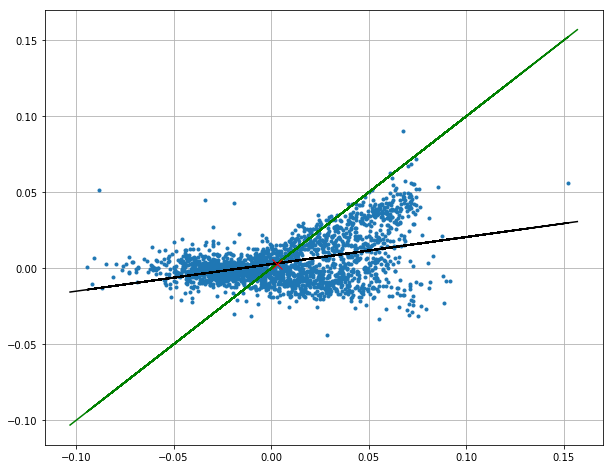

In [31]:
compare_pixels(maps2['C'], maps3['C'])

[ 1.04687538 -0.01898588]


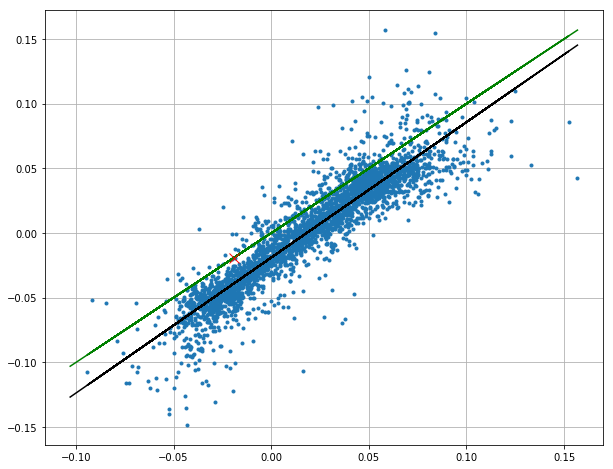

In [32]:
compare_pixels(maps2['C'], maps5['C'])

[ 0.82033199 -0.01308258]


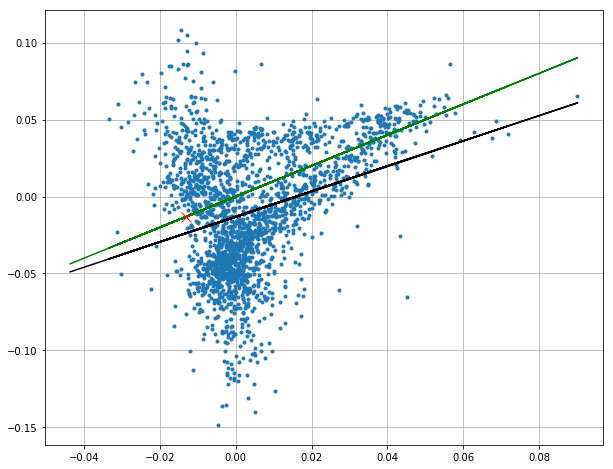

In [33]:
compare_pixels(maps3['C'], maps5['C'])

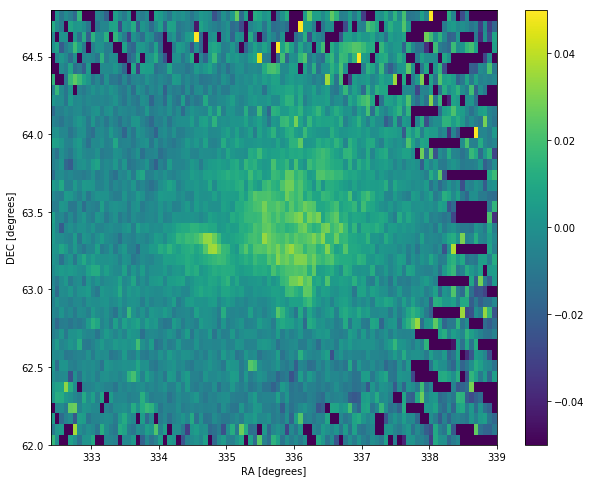

In [38]:
difference_map(maps2['A'], maps2['B'])

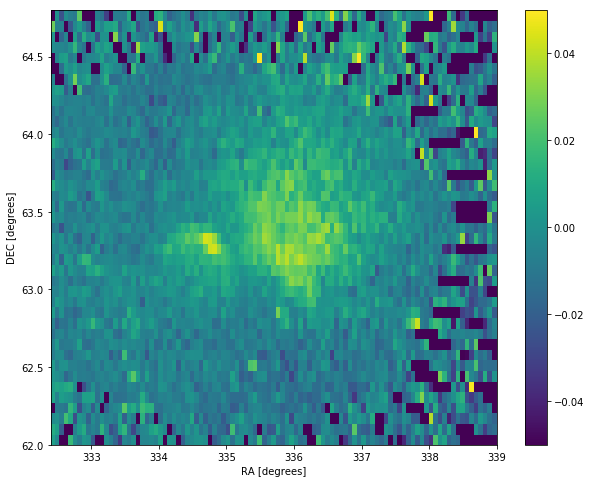

In [39]:
difference_map(maps2['A'], maps2['C'])

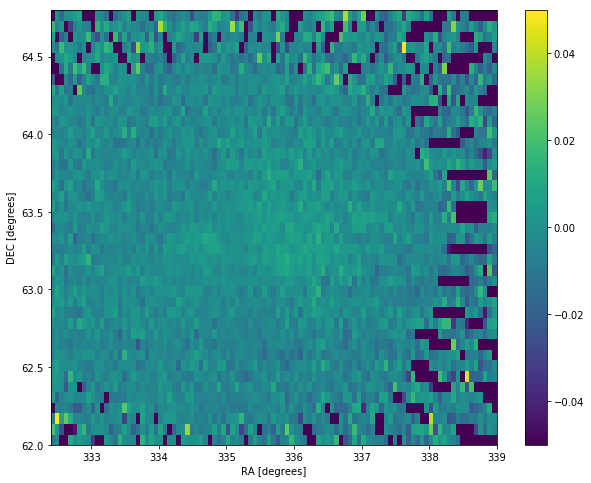

In [40]:
difference_map(maps2['B'], maps2['C'])

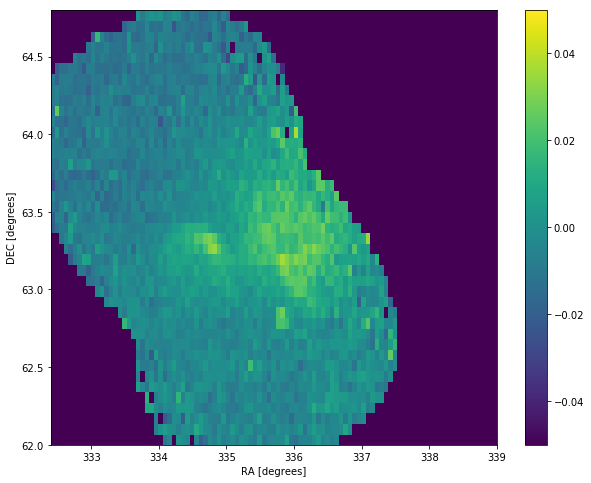

In [53]:
difference_map(maps3['A'], maps3['B'])

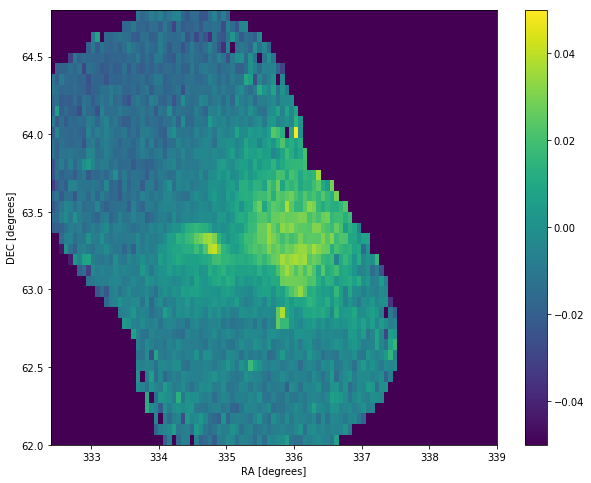

In [54]:
difference_map(maps3['A'], maps3['C'])

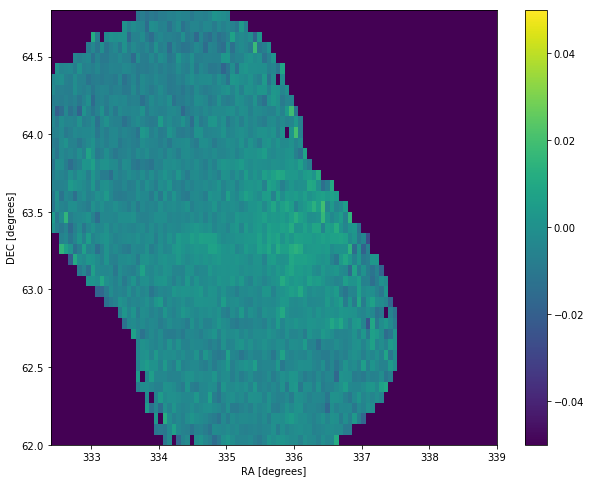

In [55]:
difference_map(maps3['B'], maps3['C'])

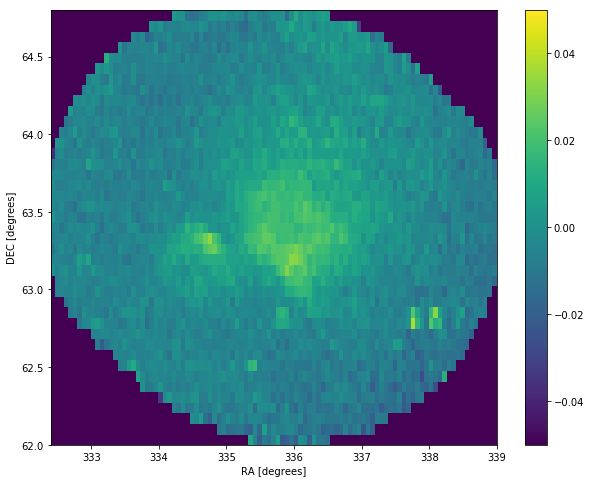

In [57]:
difference_map(maps5['A'], maps5['B'])

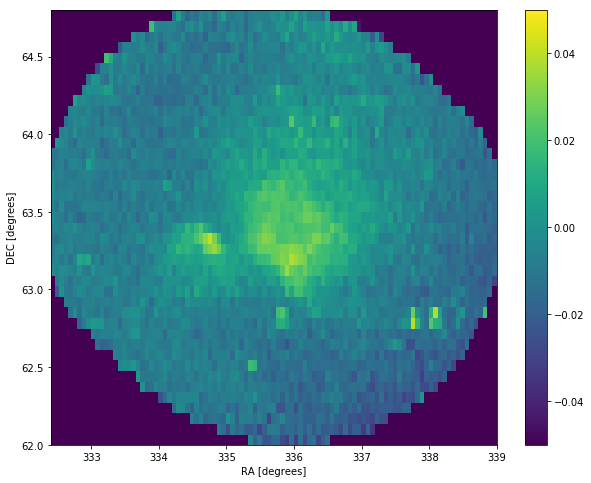

In [58]:
difference_map(maps5['A'], maps5['C'])

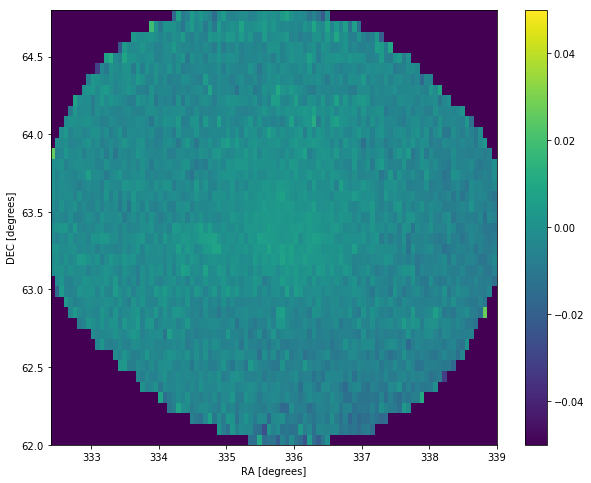

In [59]:
difference_map(maps5['B'], maps5['C'])

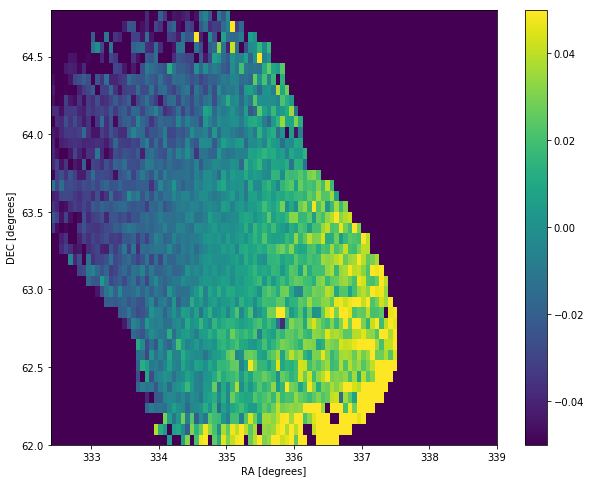

In [65]:
difference_map(maps2['A'], maps3['A'], True)

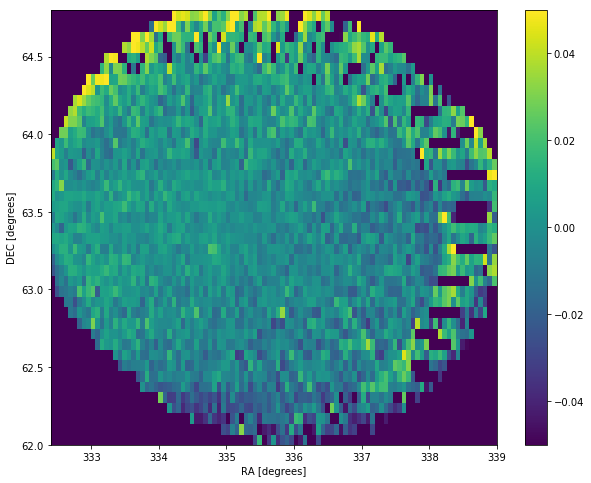

In [66]:
difference_map(maps2['A'], maps5['A'], True)

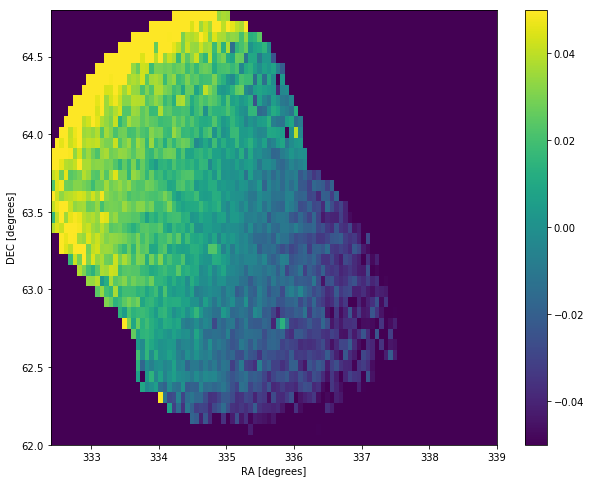

In [67]:
difference_map(maps3['A'], maps5['A'], True)

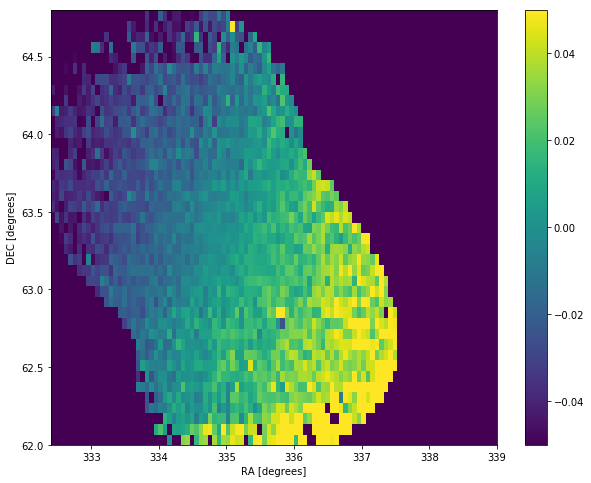

In [68]:
difference_map(maps2['B'], maps3['B'], True)

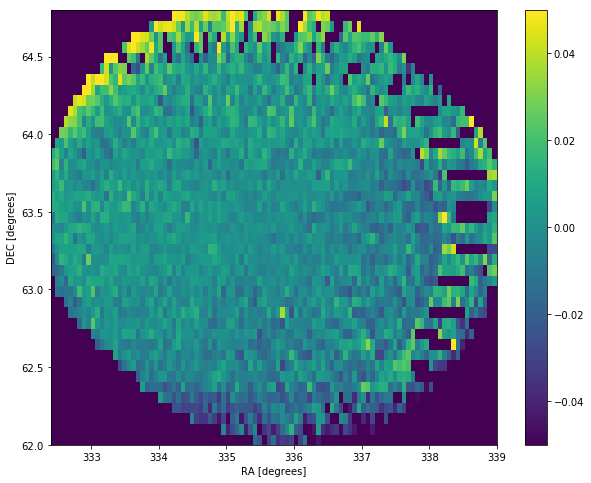

In [69]:
difference_map(maps2['B'], maps5['B'], True)

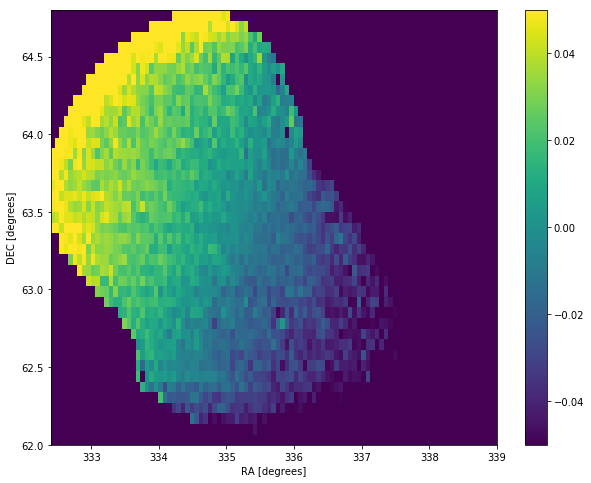

In [70]:
difference_map(maps3['B'], maps5['B'], True)

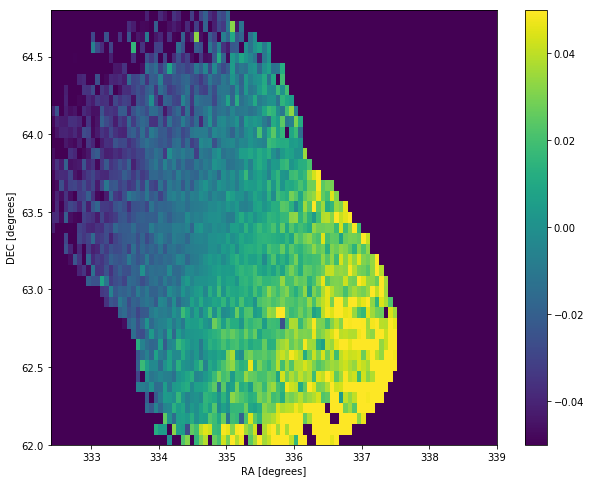

In [71]:
difference_map(maps2['C'], maps3['C'], True)

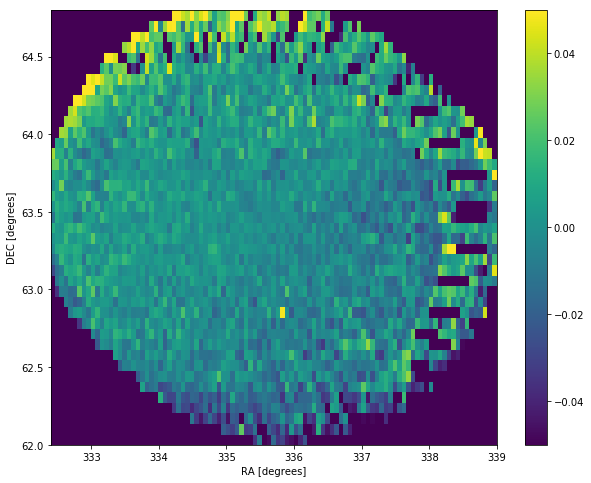

In [72]:
difference_map(maps2['C'], maps5['C'], True)

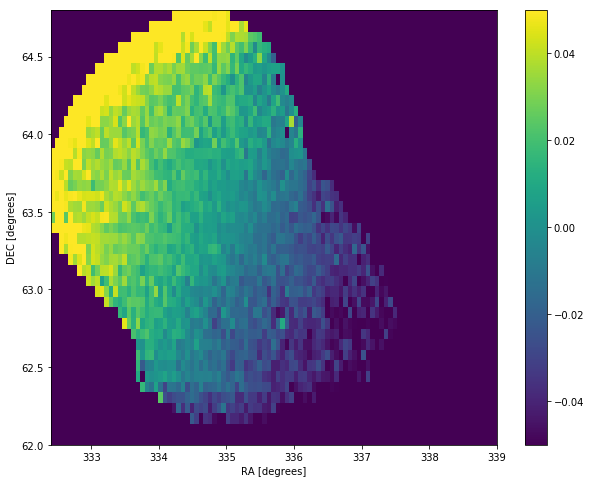

In [73]:
difference_map(maps3['C'], maps5['C'], True)